In [1]:
import glob
import pandas as pd
import numpy as np
import os
import csv
import sys
import random

In [2]:
#Read CSV file containing the MSOA and OA values only from the North East of England
df_persons_NE_occupation_dir = r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\economic_activity\occupation' # use your path
df_persons_NE_occupation_file = os.path.join(df_persons_NE_occupation_dir, "df_after_occupation_20211126_v7.csv")
df_persons_NE_occupation = pd.read_csv(df_persons_NE_occupation_file, index_col=None, header=0)

In [3]:
# Create a new column for the Occupation
df_persons_NE_occupation['Income'] = np.nan

In [256]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
occupation_2_income = [14500,69000]
#occupation_3_income = [20000,35000]
#occupation_4_income = [13000,24000]
#occupation_5_income = [23000,27000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [9000,18000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [2]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 0.2 * income_age_width_slot    
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - (income_age_width_slot/3)
            income_max = occupation_income[0] + 4 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 1.5 * income_age_width_slot
            income_max = occupation_income[0] + 5.5 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 5 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 2 * income_age_width_slot
            income_max = occupation_income[0] + 6.5 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0]
            income_max = occupation_income[0] + 3 * income_age_width_slot



       
        
        
        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')


Occupation running:
2
Merging dataframes:
Job done. check the results


In [257]:
column = df_occupation_2["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

6840.0
78690.0
36142.27884607007
33470.0


In [258]:
37156 - mean_value

1013.7211539299315

In [259]:
34475 - median_value

1005.0

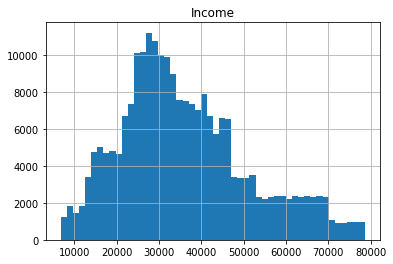

In [260]:
df_income.hist(column='Income', bins=50);

In [261]:
print(18173 - df_occupation_2.Income.quantile(0.1))
print(23699 - df_occupation_2.Income.quantile(0.2))
print(27144- df_occupation_2.Income.quantile(0.3))
print(30920 - df_occupation_2.Income.quantile(0.4))
print(37270 - df_occupation_2.Income.quantile(0.6))
print(41868 - df_occupation_2.Income.quantile(0.7))
print(47088 - df_occupation_2.Income.quantile(0.8))
print(60380 - df_occupation_2.Income.quantile(0.9))

253.0
-51.0
104.0
850.0
-480.0
-252.0
-652.0
870.0


### Check the order of the median income per range of age

In [269]:
df_income_16_17_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=16) & (df_occupation_2['Age'] <=17)]

df_income_16_17_occupation_2["Income"].median()

8270.0

In [270]:
df_income_18_21_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=18) & (df_occupation_2['Age'] <=21)]

df_income_18_21_occupation_2["Income"].median()

12170.0

In [271]:
df_income_22_29_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=22) & (df_occupation_2['Age'] <=29)]

df_income_22_29_occupation_2["Income"].median()

24270.0

In [272]:
df_income_30_39_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=30) & (df_occupation_2['Age'] <=39)]

df_income_30_39_occupation_2["Income"].median()

33280.0

In [273]:
df_income_40_49_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=40) & (df_occupation_2['Age'] <=49)]

df_income_40_49_occupation_2["Income"].median()

57470.0

In [274]:
df_income_50_59_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=50) & (df_occupation_2['Age'] <=59)]

df_income_50_59_occupation_2["Income"].median()

37240.0

In [275]:
df_income_60_120_occupation_2 = df_occupation_2.loc[(df_occupation_2['Age'] >=60)]

df_income_60_120_occupation_2["Income"].median()

22440.0

In [276]:
df_occupation_2_saved = df_occupation_2

df_occupation_2.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_2_20220201.csv', encoding='utf-8', header=True)


### Occupation 3

In [385]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
occupation_3_income = [13300,50300]
#occupation_4_income = [13000,24000]
#occupation_5_income = [23000,27000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [9000,18000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [3]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 0.2 * income_age_width_slot    
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - (income_age_width_slot/3)
            income_max = occupation_income[0] + 4.5 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 1.5 * income_age_width_slot
            income_max = occupation_income[0] + 6.75 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 6 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 2 * income_age_width_slot
            income_max = occupation_income[0] + 7.25 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0]
            income_max = occupation_income[0] + 3 * income_age_width_slot



       
        
        
        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
3
Merging dataframes:
Job done. check the results


In [386]:
column = df_occupation_3["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

6310.0
56750.0
29151.85517986915
27720.0


In [387]:
29762 -  mean_value

610.1448201308485

In [388]:
27491 - median_value

-229.0

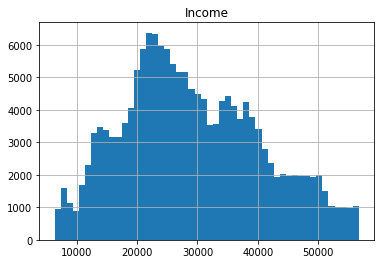

In [389]:
df_occupation_3.hist(column='Income', bins=50);

In [390]:
print(14338 - df_occupation_3.Income.quantile(0.1))
print(18920 - df_occupation_3.Income.quantile(0.2))
print(21546- df_occupation_3.Income.quantile(0.3))
print(24716 - df_occupation_3.Income.quantile(0.4))
#print(27491 - df_occupation_3.Income.quantile(0.5))
print(30423 - df_occupation_3.Income.quantile(0.6))
print(34889 - df_occupation_3.Income.quantile(0.7))
print(39348 - df_occupation_3.Income.quantile(0.8))


-222.0
-340.0
-594.0
-24.0
-757.0
-411.0
38.0


In [391]:
df_income_16_17_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=16) & (df_occupation_3['Age'] <=17)]

df_income_16_17_occupation_3["Income"].median()

7810.0

In [393]:
df_income_18_21_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=18) & (df_occupation_3['Age'] <=21)]

df_income_18_21_occupation_3["Income"].median()

11860.0

In [394]:
df_income_22_29_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=22) & (df_occupation_3['Age'] <=29)]

df_income_22_29_occupation_3["Income"].median()

21180.0

In [395]:
df_income_30_39_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=30) & (df_occupation_3['Age'] <=39)]

df_income_30_39_occupation_3["Income"].median()

28680.0

In [397]:
df_income_40_49_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=40) & (df_occupation_3['Age'] <=49)]

df_income_40_49_occupation_3["Income"].median()

44830.0

In [398]:
df_income_50_59_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=50) & (df_occupation_3['Age'] <=59)]

df_income_50_59_occupation_3["Income"].median()

30440.0

In [399]:
df_income_60_120_occupation_3 = df_occupation_3.loc[(df_occupation_3['Age'] >=60)]

df_income_60_120_occupation_3["Income"].median()

18920.0

In [400]:
df_occupation_3_saved = df_occupation_3

df_occupation_3_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_3_20220201.csv', encoding='utf-8', header=True)


## Occupation 5

In [676]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [13300,50300]
#occupation_4_income = [13000,24000]
occupation_5_income = [11500,44000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [9000,18000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [5]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 0.2 * income_age_width_slot  
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] + 0.5 * income_age_width_slot
            income_max = occupation_income[0] + 5.5 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 2 * income_age_width_slot
            income_max = occupation_income[0] + 6.5 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 6 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 2.5 * income_age_width_slot
            income_max = occupation_income[0] + 7 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0]
            income_max = occupation_income[0] + 3.2 * income_age_width_slot



       
        
        
        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
5
Merging dataframes:
Job done. check the results


In [677]:
column = df_occupation_5["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

5100.0
52610.0
28027.58728290835
27340.0


In [678]:
28438 -  mean_value

410.41271709165085

In [679]:
27211 - median_value

-129.0

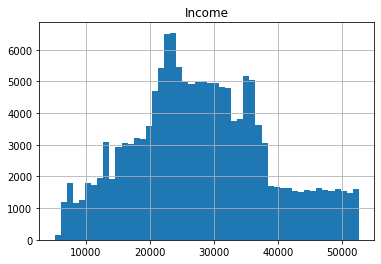

In [680]:
df_occupation_5.hist(column='Income', bins=50);

In [681]:
print(13832 - df_occupation_5.Income.quantile(0.1))
print(19431 - df_occupation_5.Income.quantile(0.2))
print(22111- df_occupation_5.Income.quantile(0.3))
print(24878 - df_occupation_5.Income.quantile(0.4))
#print( - df_occupation_5.Income.quantile(0.5))
print(29589 - df_occupation_5.Income.quantile(0.6))
print(33084 - df_occupation_5.Income.quantile(0.7))
print(36517 - df_occupation_5.Income.quantile(0.8))


-328.0
421.0
-129.0
418.0
-671.0
-286.0
7.0


In [682]:
df_income_16_17_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=16) & (df_occupation_5['Age'] <=17)]

df_income_16_17_occupation_5["Income"].median()

7380.0

In [683]:
df_income_18_21_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=18) & (df_occupation_5['Age'] <=21)]

df_income_18_21_occupation_5["Income"].median()

11250.0

In [684]:
df_income_22_29_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=22) & (df_occupation_5['Age'] <=29)]

df_income_22_29_occupation_5["Income"].median()

23180.0

In [685]:
df_income_30_39_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=30) & (df_occupation_5['Age'] <=39)]

df_income_30_39_occupation_5["Income"].median()

27850.0

In [686]:
df_income_40_49_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=40) & (df_occupation_5['Age'] <=49)]

df_income_40_49_occupation_5["Income"].median()

43180.0

In [687]:
df_income_50_59_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=50) & (df_occupation_5['Age'] <=59)]

df_income_50_59_occupation_5["Income"].median()

29740.0

In [688]:
df_income_60_120_occupation_5 = df_occupation_5.loc[(df_occupation_5['Age'] >=60)]

df_income_60_120_occupation_5["Income"].median()

18250.0

In [689]:
df_occupation_5_saved = df_occupation_5

df_occupation_5_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_5_20220201.csv', encoding='utf-8', header=True)


## Occupation 7

In [1006]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [13300,50300]
#occupation_4_income = [13000,24000]
#occupation_5_income = [11500,44000]
#occupation_6_income = [13000,17500]
occupation_7_income = [9200,32000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [9000,18000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [7]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] + 0.5 * income_age_width_slot  
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - 1 * income_age_width_slot
            income_max = occupation_income[0] + 3.2 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 0.4 * income_age_width_slot
            income_max = occupation_income[0] + 6.3 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 5 * income_age_width_slot
            income_max = occupation_income[0] + 9.5 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 1.75 * income_age_width_slot
            income_max = occupation_income[0] + 7 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0] - 1 * income_age_width_slot
            income_max = occupation_income[0] + 2.5 * income_age_width_slot




       
        
        
        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
7
Merging dataframes:
Job done. check the results


In [1007]:
column = df_occupation_7["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

4440.0
31950.0
14751.257876751695
13780.0


In [1008]:
15177 -  mean_value

425.7421232483048

In [1009]:
13757 - median_value

-23.0

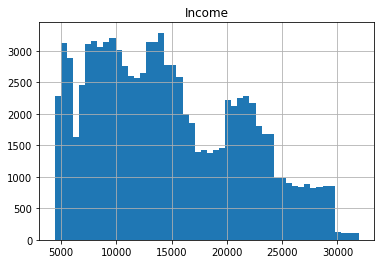

In [1012]:
df_occupation_7.hist(column='Income', bins=50);

In [1013]:
print(6430 - df_occupation_7.Income.quantile(0.1))
print(8274 - df_occupation_7.Income.quantile(0.2))
print(9914 - df_occupation_7.Income.quantile(0.3))
print(11697 - df_occupation_7.Income.quantile(0.4))
#print( - df_occupation_5.Income.quantile(0.5))
print(15964 - df_occupation_7.Income.quantile(0.6))
print(18569 - df_occupation_7.Income.quantile(0.7))
print(21034 - df_occupation_7.Income.quantile(0.8))


-50.0
-106.0
-146.0
-293.0
374.0
-31.0
-386.0


In [1014]:
df_income_16_17_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=16) & (df_occupation_7['Age'] <=17)]

df_income_16_17_occupation_7["Income"].median()

5360.0

In [1015]:
df_income_18_21_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=18) & (df_occupation_7['Age'] <=21)]

df_income_18_21_occupation_7["Income"].median()

7480.0

In [1016]:
df_income_22_29_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=22) & (df_occupation_7['Age'] <=29)]

df_income_22_29_occupation_7["Income"].median()

11650.0

In [1017]:
df_income_30_39_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=30) & (df_occupation_7['Age'] <=39)]

df_income_30_39_occupation_7["Income"].median()

16470.0

In [1018]:
df_income_40_49_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=40) & (df_occupation_7['Age'] <=49)]

df_income_40_49_occupation_7["Income"].median()

25030.0

In [1019]:
df_income_50_59_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=50) & (df_occupation_7['Age'] <=59)]

df_income_50_59_occupation_7["Income"].median()

18590.0

In [1020]:
df_income_60_120_occupation_7 = df_occupation_7.loc[(df_occupation_7['Age'] >=60)]

df_income_60_120_occupation_7["Income"].median()

10550.0

In [1021]:
df_occupation_7_saved = df_occupation_7

df_occupation_7_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_7_20220202.csv', encoding='utf-8', header=True)


### Occupation 8

In [1471]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [13300,50300]
#occupation_4_income = [13000,24000]
#occupation_5_income = [11500,44000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [9200,32000]
occupation_8_income = [10000,38000]
#occupation_9_income = [9000,18000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [8]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (2*occupation_income[0]/3)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - 1.5 * income_age_width_slot
            income_max = occupation_income[0] - 0 * income_age_width_slot  
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] + 0.2 * income_age_width_slot
            income_max = occupation_income[0] + 5.5 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 2.2 * income_age_width_slot
            income_max = occupation_income[0] + 6 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 6 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 2.5 * income_age_width_slot
            income_max = occupation_income[0] + 7 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0] - 0.2 * income_age_width_slot
            income_max = occupation_income[0] + 3.3 * income_age_width_slot





        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
8
Merging dataframes:
Job done. check the results


In [1472]:
column = df_occupation_8["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

2970.0
45270.0
24660.416830283517
23920.0


In [1473]:
24382 -  mean_value

-278.4168302835169

In [1474]:
23477 - median_value

-443.0

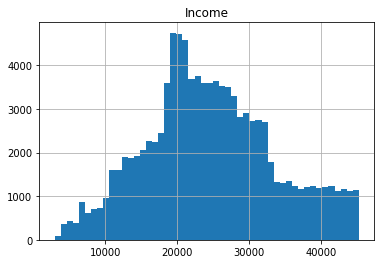

In [1475]:
df_occupation_8.hist(column='Income', bins=50);

In [1476]:
print(12858 - df_occupation_8.Income.quantile(0.1))
print(17575 - df_occupation_8.Income.quantile(0.2))
print(19323 - df_occupation_8.Income.quantile(0.3))
print(21477 - df_occupation_8.Income.quantile(0.4))
#print( - df_occupation_8.Income.quantile(0.5))
print(25768 - df_occupation_8.Income.quantile(0.6))
print(28843 - df_occupation_8.Income.quantile(0.7))
print(32000 - df_occupation_8.Income.quantile(0.8))


-242.0
305.0
-417.0
-123.0
-572.0
-137.0
-60.0


In [1479]:
df_income_16_17_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=16) & (df_occupation_8['Age'] <=17)]

df_income_16_17_occupation_8["Income"].median()

5385.0

In [1480]:
df_income_18_21_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=18) & (df_occupation_8['Age'] <=21)]

df_income_18_21_occupation_8["Income"].median()

8640.0

In [1481]:
df_income_22_29_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=22) & (df_occupation_8['Age'] <=29)]

df_income_22_29_occupation_8["Income"].median()

19690.0

In [1482]:
df_income_30_39_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=30) & (df_occupation_8['Age'] <=39)]

df_income_30_39_occupation_8["Income"].median()

23390.0

In [1483]:
df_income_40_49_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=40) & (df_occupation_8['Age'] <=49)]

df_income_40_49_occupation_8["Income"].median()

36740.0

In [1484]:
df_income_50_59_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=50) & (df_occupation_8['Age'] <=59)]

df_income_50_59_occupation_8["Income"].median()

25110.0

In [1485]:
df_income_60_120_occupation_8 = df_occupation_8.loc[(df_occupation_8['Age'] >=60)]

df_income_60_120_occupation_8["Income"].median()

15410.0

In [1486]:
df_occupation_8_saved = df_occupation_8

df_occupation_8_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_8_20220202.csv', encoding='utf-8', header=True)


### Occupation 9

In [2071]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [20000,35000]
#occupation_4_income = [13000,24000]
#occupation_5_income = [23000,27000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
occupation_9_income = [4000,28000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [9]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 0.3 * income_age_width_slot    
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - 0.3 * income_age_width_slot 
            income_max = occupation_income[0] + 9 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] - 0.2 * income_age_width_slot
            income_max = occupation_income[0] + 9.5 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 3 * income_age_width_slot
            income_max = occupation_income[0] + 12 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] - 0.1 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0] - 0 * income_age_width_slot
            income_max = occupation_income[0] + 2 * income_age_width_slot




        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
9
Merging dataframes:
Job done. check the results


In [2072]:
column = df_occupation_9["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

1490.0
34970.0
13914.946368831439
13130.0


In [2073]:
14211 -  mean_value

296.05363116856097

In [2074]:
12942 - median_value

-188.0

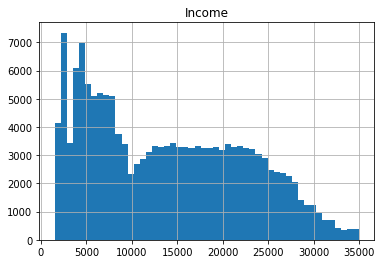

In [2075]:
df_occupation_9.hist(column='Income', bins=50);

In [2076]:
print(3480 - df_occupation_9.Income.quantile(0.1))
print(5247 - df_occupation_9.Income.quantile(0.2))
print(6937 - df_occupation_9.Income.quantile(0.3))
print(9905 - df_occupation_9.Income.quantile(0.4))
#print( - df_occupation_9.Income.quantile(0.5))
print(16037 - df_occupation_9.Income.quantile(0.6))
print(18876 - df_occupation_9.Income.quantile(0.7))
print(21907 - df_occupation_9.Income.quantile(0.8))


-70.0
107.0
-203.0
325.0
-183.0
-484.0
-563.0


In [2077]:
df_income_16_17_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=16) & (df_occupation_9['Age'] <=17)]

df_income_16_17_occupation_9["Income"].median()

2300.0

In [2078]:
df_income_18_21_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=18) & (df_occupation_9['Age'] <=21)]

df_income_18_21_occupation_9["Income"].median()

3120.0

In [2079]:
df_income_22_29_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=22) & (df_occupation_9['Age'] <=29)]

df_income_22_29_occupation_9["Income"].median()

14310.0

In [2080]:
df_income_30_39_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=30) & (df_occupation_9['Age'] <=39)]

df_income_30_39_occupation_9["Income"].median()

15100.0

In [2082]:
df_income_40_49_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=40) & (df_occupation_9['Age'] <=49)]

df_income_40_49_occupation_9["Income"].median()

21700.0

In [2083]:
df_income_50_59_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=50) & (df_occupation_9['Age'] <=59)]

df_income_50_59_occupation_9["Income"].median()

16870.0

In [2084]:
df_income_60_120_occupation_9 = df_occupation_9.loc[(df_occupation_9['Age'] >=60)]

df_income_60_120_occupation_9["Income"].median()

6320.0

In [2085]:
df_occupation_9_saved = df_occupation_9

df_occupation_9_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_9_20220202.csv', encoding='utf-8', header=True)


### Occupation 4

In [2199]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [23000, 53000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [20000,35000]
occupation_4_income = [9000,38000]
#occupation_5_income = [23000,27000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [4000,28000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [4]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 0.2 * income_age_width_slot    
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - income_age_width_slot
            income_max = occupation_income[0] + 4 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 1.5 * income_age_width_slot
            income_max = occupation_income[0] + 6 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 4.5 * income_age_width_slot
            income_max = occupation_income[0] + 11 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 2.5 * income_age_width_slot
            income_max = occupation_income[0] + 6.5 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0]
            income_max = occupation_income[0] + 3 * income_age_width_slot









        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
4
Merging dataframes:
Job done. check the results


In [2200]:
column = df_occupation_4["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

4370.0
42060.0
19208.751527660846
18590.0


In [2201]:
19492 -  mean_value

283.2484723391535

In [2202]:
18628 - median_value

38.0

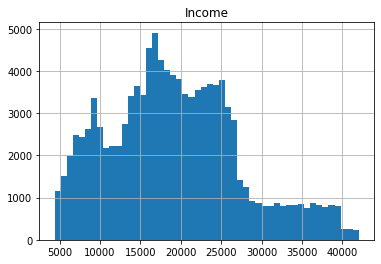

In [2203]:
df_occupation_4.hist(column='Income', bins=50);

In [2204]:
print(11511 - df_occupation_4.Income.quantile(0.2))
print(14918 - df_occupation_4.Income.quantile(0.3))
print(16982 - df_occupation_4.Income.quantile(0.4))
#print( - df_occupation_9.Income.quantile(0.5))
print(20358 - df_occupation_4.Income.quantile(0.6))

print(22567 - df_occupation_4.Income.quantile(0.7))
print(25791 - df_occupation_4.Income.quantile(0.8))



-209.0
298.0
302.0
-452.0
-613.0
361.0


In [2206]:
df_income_16_17_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=16) & (df_occupation_4['Age'] <=17)]

df_income_16_17_occupation_4["Income"].median()

5310.0

In [2207]:
df_income_18_21_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=18) & (df_occupation_4['Age'] <=21)]

df_income_18_21_occupation_4["Income"].median()

7930.0

In [2208]:
df_income_22_29_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=22) & (df_occupation_4['Age'] <=29)]

df_income_22_29_occupation_4["Income"].median()

13430.0

In [2209]:
df_income_30_39_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=30) & (df_occupation_4['Age'] <=39)]

df_income_30_39_occupation_4["Income"].median()

19800.0

In [2210]:
df_income_40_49_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=40) & (df_occupation_4['Age'] <=49)]

df_income_40_49_occupation_4["Income"].median()

31030.0

In [2211]:
df_income_50_59_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=50) & (df_occupation_4['Age'] <=59)]

df_income_50_59_occupation_4["Income"].median()

21710.0

In [2212]:
df_income_60_120_occupation_4 = df_occupation_4.loc[(df_occupation_4['Age'] >=60)]

df_income_60_120_occupation_4["Income"].median()

13130.0

In [2213]:
df_occupation_4_saved = df_occupation_4

df_occupation_4_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_4_20220215.csv', encoding='utf-8', header=True)


### Occupation 1

In [2376]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

occupation_1_income = [10000, 80000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [20000,35000]
#occupation_4_income = [9000,38000]
#occupation_5_income = [23000,27000]
#occupation_6_income = [13000,17500]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [4000,28000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
#occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [1]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] + 0.2 * (occupation_income[0])   
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] + 2.5 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 1.25 * income_age_width_slot
            income_max = occupation_income[0] + 6 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 1.75 * income_age_width_slot
            income_max = occupation_income[0] + 12 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 1.5 * income_age_width_slot
            income_max = occupation_income[0] + 8 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0]
            income_max = occupation_income[0] + 2 * income_age_width_slot









        
        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
1
Merging dataframes:
Job done. check the results


In [2377]:
column = df_occupation_1["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

4690.0
99870.0
38127.08237121925
34500.0


In [2378]:
44705 -  mean_value

6577.9176287807495

In [2379]:
33670 - median_value

-830.0

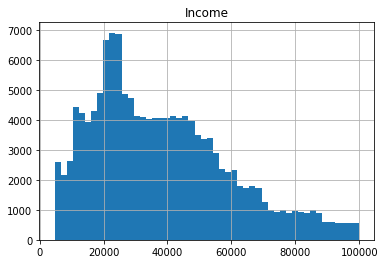

In [2380]:
df_occupation_1.hist(column='Income', bins=50);

In [2381]:
print(19267 - df_occupation_1.Income.quantile(0.2))
print(23950 - df_occupation_1.Income.quantile(0.3))
print(27933 - df_occupation_1.Income.quantile(0.4))
#print( - df_occupation_9.Income.quantile(0.5))
print(40801 - df_occupation_1.Income.quantile(0.6))

print(48528 - df_occupation_1.Income.quantile(0.7))
print(52169 - df_occupation_1.Income.quantile(0.75))



-223.0
420.0
-237.0
-269.0
928.0
799.0


In [2382]:
df_income_16_17_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=16) & (df_occupation_1['Age'] <=17)]

df_income_16_17_occupation_1["Income"].median()

5910.0

In [2383]:
df_income_18_21_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=18) & (df_occupation_1['Age'] <=21)]

df_income_18_21_occupation_1["Income"].median()

8610.0

In [2384]:
df_income_22_29_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=22) & (df_occupation_1['Age'] <=29)]

df_income_22_29_occupation_1["Income"].median()

16430.0

In [2385]:
df_income_30_39_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=30) & (df_occupation_1['Age'] <=39)]

df_income_30_39_occupation_1["Income"].median()

35770.0

In [2386]:
df_income_40_49_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=40) & (df_occupation_1['Age'] <=49)]

df_income_40_49_occupation_1["Income"].median()

58790.0

In [2387]:
df_income_50_59_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=50) & (df_occupation_1['Age'] <=59)]

df_income_50_59_occupation_1["Income"].median()

43790.0

In [2388]:
df_income_60_120_occupation_1 = df_occupation_1.loc[(df_occupation_1['Age'] >=60)]

df_income_60_120_occupation_1["Income"].median()

17270.0

In [2389]:
df_occupation_1_saved = df_occupation_1

df_occupation_1_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_1_20220215.csv', encoding='utf-8', header=True)


### Occupation 6

In [2542]:
## Income data

# Source: 
## Employee earnings in the UK: 2019 Figure 11: Median Annual full-time gross pay by occupation
### link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#### Min and Max values per occupation type in the UK (removing lower and upper values due to they can be considered as outliers)

## Values assigned manually after several iterations and starting using the first commented occupation_x_income values in
## this cell. this data was coming from Employee earnings in the UK: 2019
## link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019

#occupation_1_income = [10000, 80000]
#occupation_2_income = [14500,69000]
#occupation_3_income = [20000,35000]
#occupation_4_income = [9000,38000]
#occupation_5_income = [23000,27000]
occupation_6_income = [9000,31000]
#occupation_7_income = [12500,18000]
#occupation_8_income = [14500,26000]
#occupation_9_income = [4000,28000]

#The values we are looking for in the validation process are the ones related to the NE in the following dataset:
# link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/regionbyoccupation2digitsocashetable3
# Work Region Occupation SOC10 (2) Table 3.7a   Annual pay - Gross 2019.xls
## path: C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\Data\Census\Datasets_downloaded\Income\table32019revised


# Employee earnings in the UK: 2019. Figure 6: Weekly earnings in London are £152 higher than the UK average
## Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019
# Median full-time gross weekly earnings and percentage change from previous year, by workplace regions and countries, UK, April 2019
#median_fulltime_gross_weekly_earning_UK = 584.9
#median_fulltime_gross_weekly_earning_NE = 533.0

# Transform UK median fulltime gross weekly earning values to NE
#conversor_value_UK_to_NE = median_fulltime_gross_weekly_earning_NE / median_fulltime_gross_weekly_earning_UK


##########################################################################################

# Source: 
## Gender pay gap 
### 2019 updated revised edition of this dataset
#### genderpaygap2019revised.zip
#### Table 3.12 - Work Region Occupation SOC10 (2) Table 3.12  Gender pay gap 2019
#### TAb: all --> Table 3.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2019    
##### Link: https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

#### Gender pay gap per occupation type (median value) North East values
#occupation_1_gap = 0.264
#occupation_2_gap = 0.077
#occupation_3_gap = 0.095
#occupation_4_gap = 0.056 
#occupation_5_gap = 0.281
#occupation_6_gap = 0.074
#occupation_7_gap = 0.047
#occupation_8_gap = 0.230
#occupation_9_gap = 0.096

#### Gender pay gap per occupation type (MEAN value) North East values
#occupation_1_gap = 0.125
#occupation_2_gap = 0.114
#occupation_3_gap = 0.102
#occupation_4_gap = 0.057 
#occupation_5_gap = 0.227
occupation_6_gap = 0.132
#occupation_7_gap = 0.071
#occupation_8_gap = 0.219
#occupation_9_gap = 0.133
##########################################################################################
##########################################################################################

## code developed:

# Name all occupation types to loop through them in the code:
#occupations = [1,2,3,4,5,6,7,8,9]
occupations = [6]


for occupation in occupations:
    print('Occupation running:')
    print(occupation)
    
    #Select the row of the df_occupation that is related to the selected OA area:
    (globals()[f"df_occupation_{occupation}"]) = df_persons_NE_occupation.loc[(df_persons_NE_occupation['Occupation'] == occupation)]
    
    # Select the Min and Max income values of each occupation category:
    occupation_income = (globals()[f"occupation_{occupation}_income"])
    
    # Convert UK values to NE
    #occupation_income[0] = occupation_income[0] * conversor_value_UK_to_NE
    #occupation_income[1] = occupation_income[1] * conversor_value_UK_to_NE
    
    # Calculate the income age slot
    ## this value will indicate the range in which agents will be assigned the income based on their age
    income_age_width_slot = (occupation_income[1] - occupation_income[0])/ 10
    
    
    ##Do the calculus just agent by agent
    for idx_person, person in (globals()[f"df_occupation_{occupation}"]).iterrows():
        
        # Identify the slot of income based on the age
        ## This values were identified using https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/bulletins/annualsurveyofhoursandearnings/2019 
        ## Figure 12: Weekly earnings for women peak in age-group 40 to 49 years for the first time Median full-time gross weekly earnings by sex and age group, UK, April 2019
        ### there were identified 5 groups of age. Min and max income per occupation type were divided in 5 groups and assigned to agents based on their age
        #### Agents aged 40-49 will earn more than any other, then agents aged 30-39, then 60+, then 25-29 and finally agents aged < 25
                    
        
        
        if (person['Age'] <= 17):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] - (occupation_income[0]/3)
        elif (person['Age'] > 17 and person['Age'] <= 21):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] + 0.2 * (occupation_income[0])   
        elif (person['Age'] > 21 and person['Age'] < 30):
            income_min = occupation_income[0] - (occupation_income[0]/2)
            income_max = occupation_income[0] + 5.5 * income_age_width_slot
        elif (person['Age'] >= 30 and person['Age'] < 40):
            income_min = occupation_income[0] + 0 * income_age_width_slot
            income_max = occupation_income[0] + 7.5 * income_age_width_slot
        elif (person['Age'] >= 40 and person['Age'] < 50):
            income_min = occupation_income[0] + 0.1 * income_age_width_slot
            income_max = occupation_income[0] + 12 * income_age_width_slot 
        elif (person['Age'] >= 50 and person['Age'] < 60):
            income_min = occupation_income[0] + 0.1 * income_age_width_slot
            income_max = occupation_income[0] + 8.5 * income_age_width_slot
        elif (person['Age'] >= 60):
            income_min = occupation_income[0] - 0.1 * income_age_width_slot
            income_max = occupation_income[0] + 4 * income_age_width_slot




        
        # Find the minimum income value each agent will get based on their age
        #income_min = occupation_income[0] + income_age_slot_chosen
        #income_max = occupation_income[0] + income_age_slot_chosen + income_age_width_slot
        
        
        # Value identified as the income value of the agent based on the occupation type and age range
        income_selected_by_occupation_age = random.randint(int(income_min), int(income_max))
        
     
        # Incorporate the gender gap
        ## If male, then increase the income half of the gender income gap
        ## If female, decrease the income half of the gender income gap
        if (person['Sex'] == 1):   # Male
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age + (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        else:
            income_selected_by_occupation_age_sex = income_selected_by_occupation_age - (income_selected_by_occupation_age * (globals()[f"occupation_{occupation}_gap"])/2)
        
                       
        # Transform the income value into an integer and round it to the 10 closest value
        income_chosen = int(income_selected_by_occupation_age_sex)
        income_round = round(income_chosen,-1)
        
        # Update the value in the column "Income"
        (globals()[f"df_occupation_{occupation}"]).at[idx_person,'Income'] = income_round
        


print('Merging dataframes:')
        
#df_occupation_income = [df_occupation_1, df_occupation_2, df_occupation_3,df_occupation_4,df_occupation_5,df_occupation_6,df_occupation_7, df_occupation_8, df_occupation_9]

#df_occupation_income = [df_occupation_2]

#df_income = pd.concat(df_occupation_income)

print('Job done. check the results')

Occupation running:
6
Merging dataframes:
Job done. check the results


In [2543]:
column = df_occupation_6["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

4200.0
37730.0
15423.398751748475
14690.0


In [2544]:
15130 -  mean_value

-293.39875174847475

In [2545]:
15027 - median_value

337.0

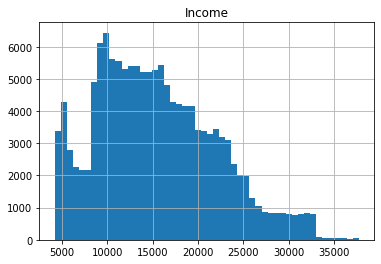

In [2546]:
df_occupation_6.hist(column='Income', bins=50);

In [2547]:
print(10031 - df_occupation_6.Income.quantile(0.25))
print(11100 - df_occupation_6.Income.quantile(0.3))
print(13232 - df_occupation_6.Income.quantile(0.4))
#print( - df_occupation_6.Income.quantile(0.5))
print(16788 - df_occupation_6.Income.quantile(0.6))

print(18457 - df_occupation_6.Income.quantile(0.7))
print(20911 - df_occupation_6.Income.quantile(0.8))


-289.0
-57.999999999956344
322.0
318.0
-203.0
-319.0


In [2541]:
df_occupation_6.Income.quantile(0.25)

10380.0

In [2480]:
income_age_width_slot

2200.0

In [2548]:
df_income_16_17_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=16) & (df_occupation_6['Age'] <=17)]

df_income_16_17_occupation_6["Income"].median()

5075.0

In [2549]:
df_income_18_21_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=18) & (df_occupation_6['Age'] <=21)]

df_income_18_21_occupation_6["Income"].median()

7370.0

In [2551]:
df_income_22_29_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=22) & (df_occupation_6['Age'] <=29)]

df_income_22_29_occupation_6["Income"].median()

12300.0

In [2552]:
df_income_30_39_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=30) & (df_occupation_6['Age'] <=39)]

df_income_30_39_occupation_6["Income"].median()

16450.0

In [2554]:
df_income_40_49_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=40) & (df_occupation_6['Age'] <=49)]

df_income_40_49_occupation_6["Income"].median()

21120.0

In [2553]:
df_income_50_59_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=50) & (df_occupation_6['Age'] <=59)]

df_income_50_59_occupation_6["Income"].median()

17350.0

In [2550]:
df_income_60_120_occupation_6 = df_occupation_6.loc[(df_occupation_6['Age'] >=60)]

df_income_60_120_occupation_6["Income"].median()

12550.0

In [2555]:
df_occupation_6_saved = df_occupation_6

df_occupation_6_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_occupation_6_20220216.csv', encoding='utf-8', header=True)


In [2569]:
frames = [df_occupation_1, df_occupation_2, df_occupation_3, df_occupation_4, df_occupation_5, df_occupation_6, df_occupation_7, df_occupation_8, df_occupation_9]

df_income_all = pd.concat(frames)

In [2566]:
df_income_all_saved = df_income_all

df_income_all_saved.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\df_income_all_saved_20220216.csv', encoding='utf-8', header=True)


In [2559]:
column = df_income_all["Income"]
min_value = column.min()
max_value = column.max()
mean_value = column.mean()
median_value = column.median()

print(min_value)
print(max_value)
print(mean_value)
print(median_value)

1490.0
99870.0
25634.970058154257
23050.0


In [2560]:
22602 - median_value

-448.0

In [2561]:
26339 - mean_value

704.0299418457435

In [2563]:
print(7993 - df_income_all.Income.quantile(0.1))
print(12607 - df_income_all.Income.quantile(0.2))
print(16679 - df_income_all.Income.quantile(0.3))
print(19560 - df_income_all.Income.quantile(0.4))
print(22602 - df_income_all.Income.quantile(0.5))
print(26126 - df_income_all.Income.quantile(0.6))
print(30605 - df_income_all.Income.quantile(0.7))
print(36523 - df_income_all.Income.quantile(0.8))
print(45580 - df_income_all.Income.quantile(0.9))

-767.0
-433.0
149.0
-510.0
-448.0
-124.0
175.0
193.0
-50.0


In [2564]:
print(df_income_all.Income.quantile(0.1))
print(df_income_all.Income.quantile(0.2))
print(df_income_all.Income.quantile(0.3))
print(df_income_all.Income.quantile(0.4))
print(df_income_all.Income.quantile(0.5))
print(df_income_all.Income.quantile(0.6))
print(df_income_all.Income.quantile(0.7))
print(df_income_all.Income.quantile(0.8))
print(df_income_all.Income.quantile(0.9))

8760.0
13040.0
16530.0
20070.0
23050.0
26250.0
30430.0
36330.0
45630.0


In [2565]:
mean_value

25634.970058154257

In [2570]:
df_income_all_1 = df_income_all.loc[(df_income_all['Age'] >=16) & (df_income_all['Age'] <=17)]

df_income_all_1["Income"].median()

5500.0

In [2571]:
df_income_all_2 = df_income_all.loc[(df_income_all['Age'] >=18) & (df_income_all['Age'] <=21)]

df_income_all_2["Income"].median()

8230.0

In [2572]:
df_income_all_3 = df_income_all.loc[(df_income_all['Age'] >=22) & (df_income_all['Age'] <=29)]

df_income_all_3["Income"].median()

17210.0

In [2573]:
df_income_all_4 = df_income_all.loc[(df_income_all['Age'] >=30) & (df_income_all['Age'] <=39)]

df_income_all_4["Income"].median()

24940.0

In [2574]:
df_income_all_5 = df_income_all.loc[(df_income_all['Age'] >=40) & (df_income_all['Age'] <=49)]

df_income_all_5["Income"].median()

39880.0

In [2575]:
df_income_all_6 = df_income_all.loc[(df_income_all['Age'] >=50) & (df_income_all['Age'] <=59)]

df_income_all_6["Income"].median()

26430.0

In [2576]:
df_income_all_7 = df_income_all.loc[(df_income_all['Age'] >=60)]

df_income_all_7["Income"].median()

15560.0